In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.tri import Triangulation
from matplotlib.patches import Circle
import h5py
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.tri import Triangulation

def plot_from_hdf5_with_object(hdf5_file):
    with h5py.File(hdf5_file, 'r') as file:
        X = file['X'][:]
        Y = file['Y'][:]
        p = np.sqrt(file['u'][:]**2 +file['v'][:]**2)
        #p = file["p"][:]
    # Create a triangulation to use for the contour plot
    triang = Triangulation(X.flatten(), Y.flatten())

    # Plot the pressure field
    plt.figure(figsize=(10, 6))
    contour = plt.tricontourf(triang, p.flatten(), levels=50, cmap='viridis')
    plt.colorbar(contour, label='Absolut velocity (|v|)')
    
    R = 0.5
    lx = X[0,len(X[0])//4]
    ly = Y[len(Y)//2,0]
    r = ((X - lx) ** 2 + (Y - ly) ** 2) ** 0.5

    plt.contour(X, Y, r, levels=[R], colors='red', linewidths=2, linestyles='--')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Absolut velocity Field with Object from HDF5')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()



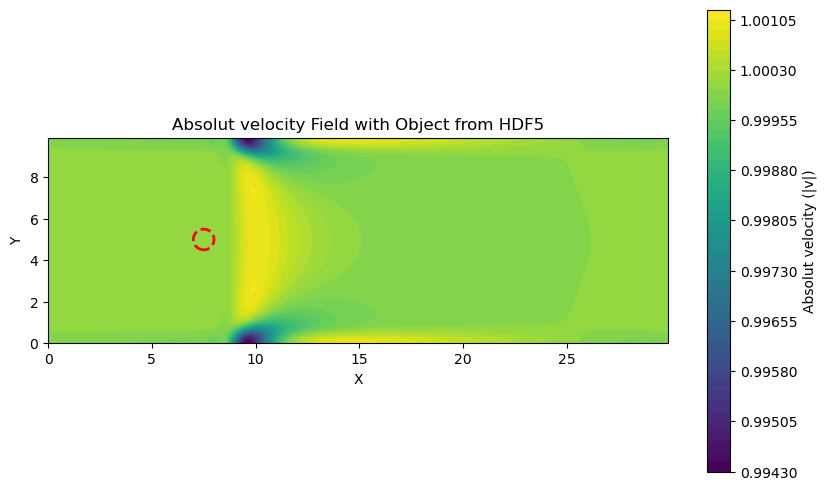

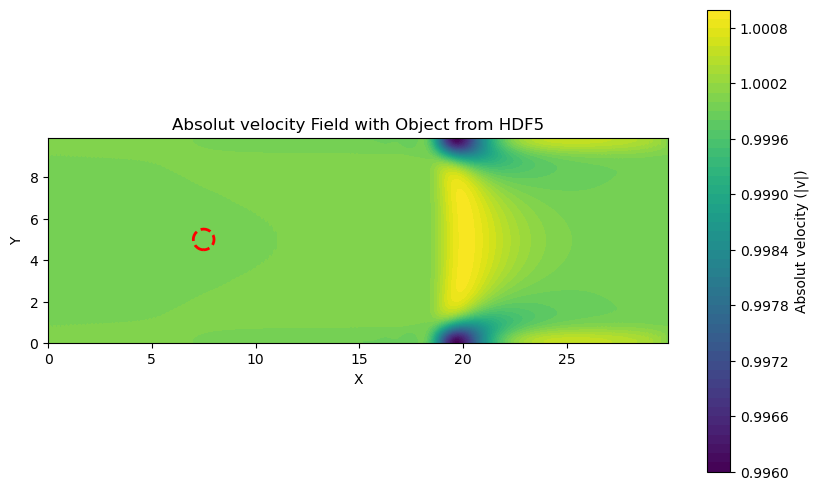

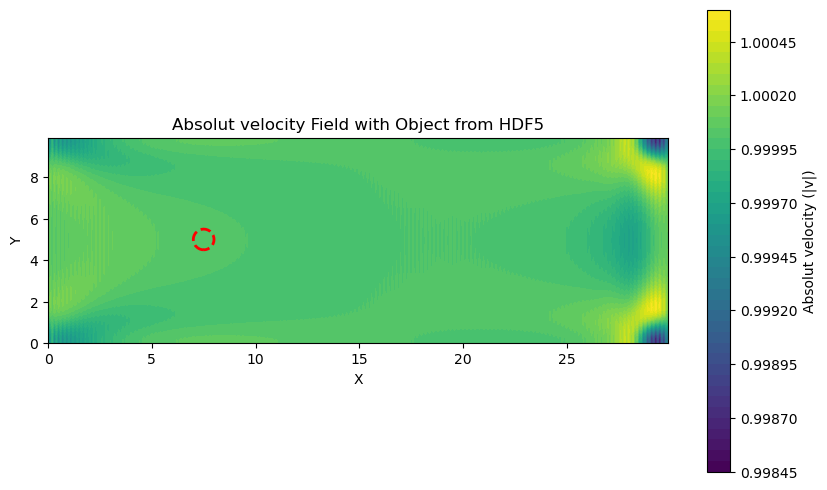

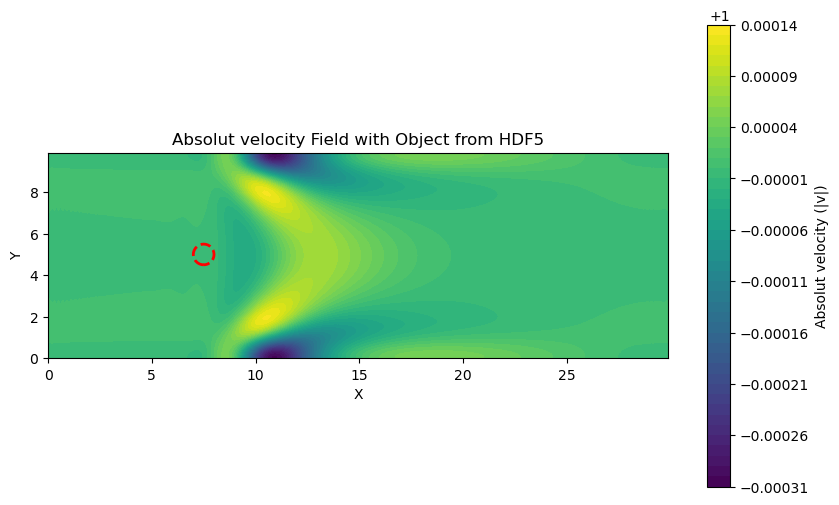

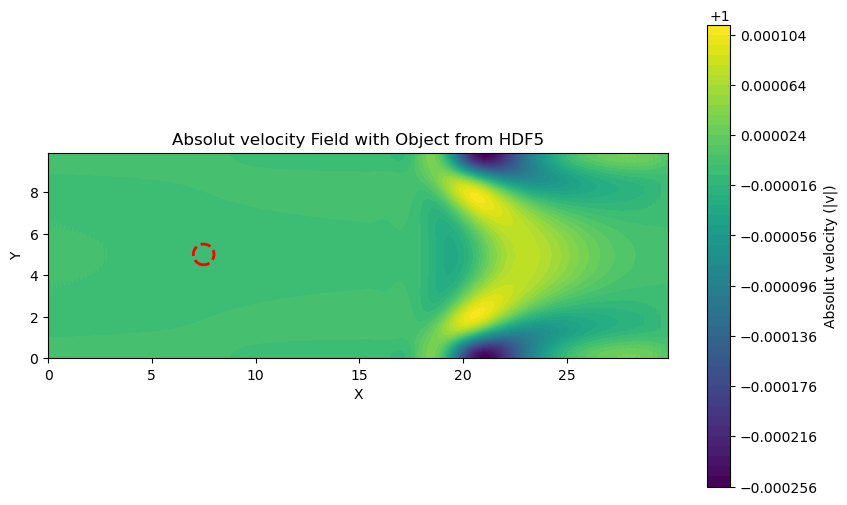

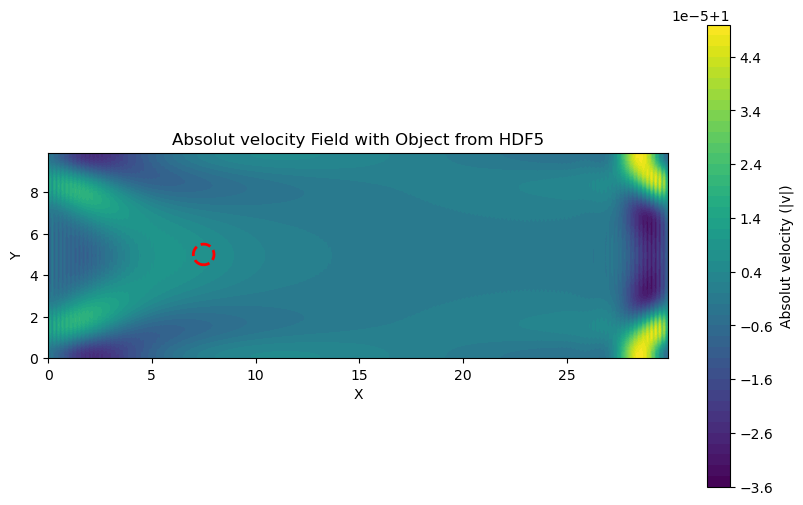

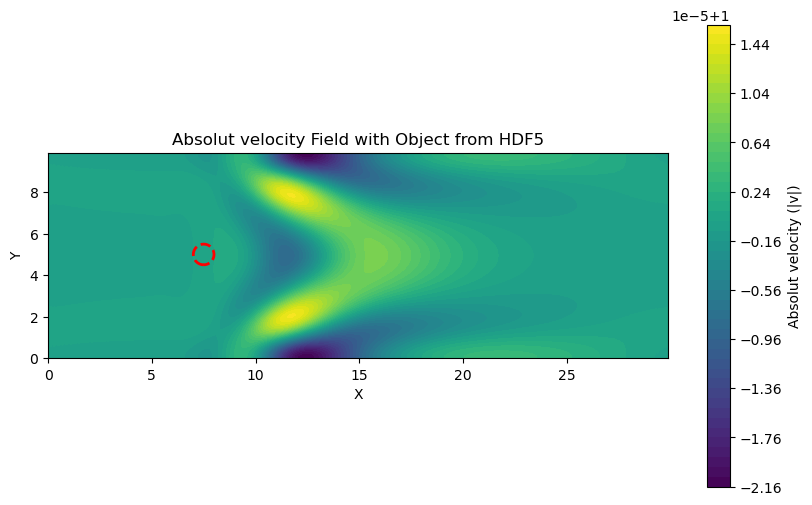

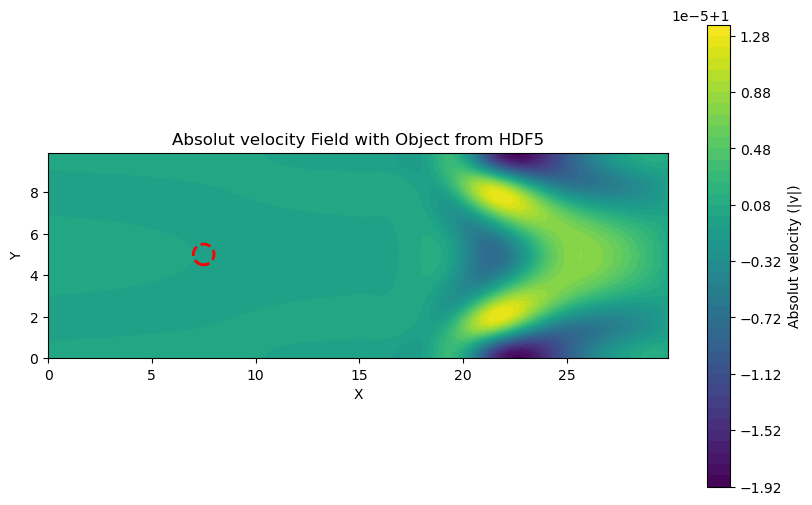

In [8]:
DATA = ['10.005', '20.01', '30.015', '40.02', '50.025', '60.03', '70.035', '80.04']
for i in DATA:
    plot_from_hdf5_with_object('results/U_'+i)